# Background Note 

# Probability: Normal Distribution and Central Limit Theorem

# Solutions to Exercises

## By Albert S. Kyle

There are probably plenty of typos, or even errors, in these notes.  Please let me know about them when you spot them.

$\require{\newcommand}$
$\require{\renewcommand}$
$\renewcommand{\sm}{ {\scriptstyle{\text{*}}}}$ 
$\renewcommand{\mm}{{\scriptsize @}}$
$\newcommand{\E}{\mathrm{E}}$
$\newcommand{\e}{\mathrm{e}}$
$\newcommand{\drm}{\mathrm{\, d}}$
$\newcommand{\var}{\mathrm{var}}$
$\newcommand{\stdev}{\mathrm{stdev}}$
$\renewcommand{\t}{^{\mathsf{T}}}$
$\renewcommand{\comma}{\, , \,}$
$\renewcommand{\vec}[1]{\mathbf{#1}}$
$\newcommand{\skew}{\mathrm{skew}}$
$\newcommand{\kurt}{\mathrm{kurt}}$
$\newcommand{\prob}{\textrm{prob}}$
$\newcommand{\midx}{\, \mid \,}$


In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import sys
import datetime
import timeit
import math
import statistics
import nbconvert

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('NumPy version ' + np.__version__)
print('SciPy version ' + scipy.__version__)
print('matplotlib version ' + matplotlib.__version__)

timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print("Timestamp:", timestamp)

tstart = timeit.default_timer()


Python version 3.8.11 (default, Aug  6 2021, 09:57:55) [MSC v.1916 64 bit (AMD64)]
Pandas version 1.5.3
NumPy version 1.23.5
SciPy version 1.10.1
matplotlib version 3.7.1
Timestamp: 2023-09-05 16:48:30


##### Conventions

These notes define the function `f()` so that its definition changes from cell to cell.  By using local variables to make the examplesself-contained, this approach avoids name clashes, except for the name of the function `f()` itself. 

### Exercise 0 (Easy)

Verify by applying the actual pdf formula for the standard normal distribution that `scipy.stats.norm(0.00, 1.00).pdf(z)` gives the correct pdf for the standard normal distribution.

### Solution 0

The solution is obtained by adding another graph to the plot of the cdf, then verifying that the graphs look similar.

For a more careful comparions, the function `np.isclose` might be used, or the maximum difference between the two pdfs might be calculated.

pdf and pdfz are close with rtol0=1e-16: True
maxdiff = 0.0


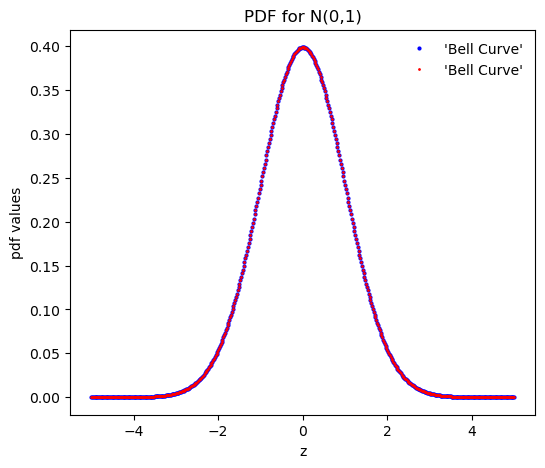

In [2]:
def f():
    nobs = 501
    zmin = -5.00
    zmax = +5.00

    z = np.linspace(start=zmin, stop=zmax, num=nobs, endpoint=True)

    norm01 = scipy.stats.norm(0.00, 1.00)
    pdf = norm01.pdf(z)
    cdf = norm01.cdf(z)
    
    pdfz = np.exp(-0.50 * z * z) / np.sqrt(2.00 * np.pi)

    rtol0 = 1e-16
    bsame = np.isclose(pdf, pdfz, rtol=rtol0).all()
    
    print(f"pdf and pdfz are close with {rtol0=}: {bsame}")
    
    maxdiff = np.abs(pdf - pdfz).max()

    print(f"{maxdiff = }")
    
    fig, ax = plt.subplots(1, 1, figsize=(6,5))
    ax.set_title("PDF for N(0,1)")
    ax.set_xlabel("z")
    ax.set_ylabel("pdf values")
    ax.plot(z, pdf, 'bo', ms=2, label="'Bell Curve'")
    ax.plot(z, pdfz, 'ro', ms=1, label="'Bell Curve'")
    ax.legend(loc='best', frameon=False)

    plt.show()

f()


The solution shows that the `scipy.stats.norm(0.00, 1.00).pdf(z)` gives exactly the same values as the correct pdf, up to numerical error.

### Exercise 1 (easy)

The stock market is often thought to have a standard deviation of about 1 percent per day. This percentage standard deviation of 0.01 is often called **volatility** instead of **standard deviation**. On October 19, 1987, the stock market fell more than 30 percent in one day. Theoretically, this would be a "30 standard deviation event".

1. What is the probability of a change in the stock market value with absolute value greater than 3 percent in one day, assuming a typical daily volatility of 1 percent?

2. How many 30 percent or greater stock market crashes would occur on average every 1000 years if the daily volatility were 2 percent (approximately double typcical daily volatility)?

### Solution 1.1

We need to calculate the sum of the probabilities of a change greater than $+3$ standard deviations and less than $-3$ standard deviations.  There are several ways to do this using `scipy.stats.norm` or `statistics.NormalDist`:


In [3]:
def f():

    nstd = 3.00

    rvz = scipy.stats.norm(0.00, 1.00)
    print(2.00 * rvz.cdf(-nstd))
    print(rvz.cdf(-nstd) + rvz.sf(nstd))  # Uses survival function sf(z) = 1 - cdf(z)
    print(rvz.cdf(-nstd) + (1.00 - rvz.cdf(nstd)))
    print((rvz.cdf(-nstd) + 1.00) - rvz.cdf(nstd))

    import statistics
    rvzz = statistics.NormalDist(0.00, 1.00)
    print((rvzz.cdf(-nstd) + 1.00) - rvzz.cdf(nstd))
    print(2.00 * rvzz.cdf(-nstd))

    print(f"\n{rvz.cdf(nstd)=}")
    
f()    

0.0026997960632601866
0.0026997960632601866
0.0026997960632601965
0.002699796063260096
0.002699796063260318
0.002699796063260207

rvz.cdf(nstd)=0.9986501019683699


The probability is about 0.27 percent per day, less than once per year (of about 250 trading days).

The third and fourth calculations differ only because associativity of addition is applied in a different order. The third an fourth approaches give slightly different answers from the first two because they are more affected by rounding error. Rounding error is typically a problem when two quantities of approximately equal size are subtracted from each other to obtain a difference which is small.  In this case, `rvz.cdf(nstd)` has a value close to one. The use of the survival function `rvz.sf(nstd)` addresses this problem of rounding error.



### Solution 1.2

With a daily volatility of 2 percent, a 30 percent stock price decline is a -15 standard deviation event. The probability of a crash in 1000 years is essentially 0, less than $10^{-45}$.

This example implies that naive application of normal distributions is not a good way to model outlier events for market returns.

Traders were surprised by the crash.  I met a formerly successful trader who was wiped out in the 1987 crash and had been driving a taxi cab since October 1987.

In [4]:
def f():

    rvz = scipy.stats.norm(0.00, 1.00)
    nstd = -15.00
    nyears = 1000
    print(f"{rvz.cdf(nstd)=}")
    print(f"Expected number of crashes per {nyears} years: {rvz.cdf(nstd) * nyears * 250=}")

f()    

rvz.cdf(nstd)=3.6709661993126986e-51
Expected number of crashes per 1000 years: rvz.cdf(nstd) * nyears * 250=9.177415498281746e-46


### Exercise 2

Researchers often informally assume that a random variable will lie with $\pm 2$ standard deviations of the mean about 95 percent of the time ("two-tailed test"). This implies a probability of about 97.5 percent that the outcome is greater than $+2$ standard deviations and a $97.5$ percent probability that the outcome is less than $-2$ standard deviations ("one-tailed test").

1. Using `scipy.stats.binom(...).cdf(...)`, verify whether this intuition is reasonable for binomial random variables with numbers of trials $N=5$, $10$, $20$, $40$, $100$, $500$ and probabilities of success $p=0.05$, $0.10$, $0.25$, $0.50$, $0.75$, $0.90$, and $0.95$. Express the result as a Pandas dataframe with rows corresponding to values of $N$, columns corresponding to values of $p$, and cell values equal to the one-tailed test. Include a row for the normal distribution represented by $N=0$. (The notation $N=\infty$ would be better notation, but Numpy's integer dtype does not support infinity.)

2. Explain why it is unnecessary to construct two dataframes, one for a right-tail probabilities and one for left-tail probabilities.


### Solution 2.1


In [5]:
def f():

    N = [0, 5, 10, 20, 40, 100, 500]
    p =[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]

    nstd = 2.00
    
    Ns = []
    ps = []
    probs = []

    for _n in N:
        for _p in p:
            Ns.append(_n)
            ps.append(_p)
            if _n == 0:
                rv = scipy.stats.norm(0, 1)
                probs.append(rv.cdf(nstd))
            else:    
                rv = scipy.stats.binom(_n, _p)
                probs.append(rv.cdf(rv.mean() + nstd * rv.std()))

    df = pd.DataFrame({'N' : Ns, 'p' : ps, 'prob' : probs})
    df = df.set_index(['N', 'p']).unstack(level=1)

    display(df)
    
f()    

prob                                                            
p        0.05      0.10      0.25      0.50      0.75      0.90      0.95
N                                                                        
0    0.977250  0.977250  0.977250  0.977250  0.977250  0.977250  0.977250
5    0.977407  0.918540  0.984375  0.968750  1.000000  1.000000  1.000000
10   0.913862  0.929809  0.980272  0.989258  1.000000  1.000000  1.000000
20   0.924516  0.956826  0.959075  0.979305  0.975687  1.000000  1.000000
40   0.951972  0.958098  0.973755  0.980761  0.983958  0.985219  1.000000
100  0.971812  0.979401  0.972405  0.982400  0.978889  0.992164  0.994079
500  0.969740  0.974947  0.976697  0.977968  0.979467  0.981367  0.980142

### Solution 2.2

The binomial distribution has the symmetry property that "failure" for $1-p$ is equivalent to "success" for $p$, and vice versa.  This makes the results symmetric. If we calculated probabilities for the left tail rather than the right tail, the results for $p$ in one dateframe would match the results for $1-p$ in the other dataframe.


In [6]:
timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
tfinish = timeit.default_timer()
print(f"Finished: {timestamp = }\nExecution time = {tfinish - tstart} s")


Finished: timestamp = '2023-09-05 16:48:31'
Execution time = 1.5492024000000004 s
